                                        DEMAND FORECASTING FOR RETAIL INVENTORY MANAGEMENT ANN DL

1. IMPORTING LIBRARIES

In [1]:
# Core Libraries
import pandas as pd
import numpy as np


In [2]:
# Training, Model Selection, Metrics Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential, load_model


In [3]:
# Importing Visualisation liraries
import matplotlib.pyplot as plt
import seaborn as sns


2. LOAD THE DATASET

In [4]:
# Load the Data Set
Data_Frame = pd.read_csv("Retail_Store_Inventory_ANN_DL.csv")


In [5]:
# Displaying the first five rows
Data_Frame.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
# Displaying the statistics 
Data_Frame.describe()


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [7]:
# Displaying the Information
Data_Frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

3. DATA PREPROCESSING

In [8]:
# Getting the dimensions of the Data Frame
print("Shape of the DataSet: ", Data_Frame.shape)


Shape of the DataSet:  (73100, 15)


In [9]:
# Dropping Unnecessary Columns
Data_Frame = Data_Frame.drop(columns=['Date', 'Store ID', 'Product ID'])


In [10]:
# Checking for Missing Values
print(Data_Frame.isnull().sum())


Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [11]:
# Checking for Duplicate Rows
print("Duplicate Rows: ", Data_Frame.duplicated().sum())


Duplicate Rows:  0


In [12]:
# Getting the dimensions of the Data Frame
print("Shape of the DataSet: ", Data_Frame.shape)


Shape of the DataSet:  (73100, 12)


4. DATA VISUALISATION

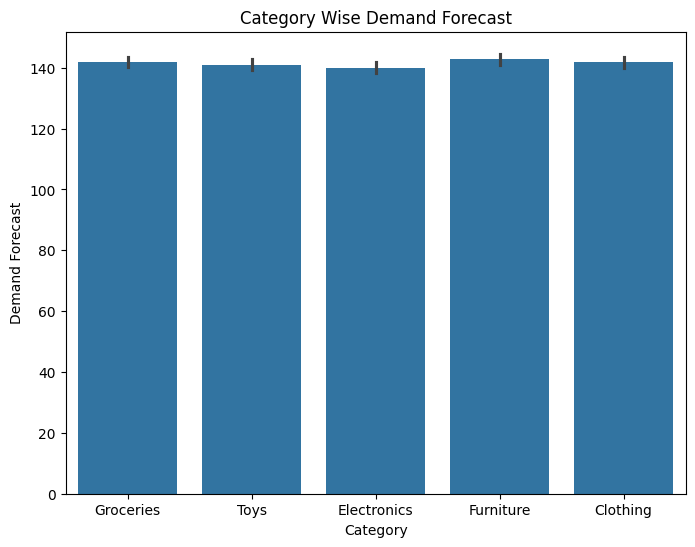

In [13]:
# Category Wise Demand Forecast Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Demand Forecast', data=Data_Frame)
plt.title('Category Wise Demand Forecast')
plt.xlabel('Category')
plt.ylabel('Demand Forecast')
plt.show()


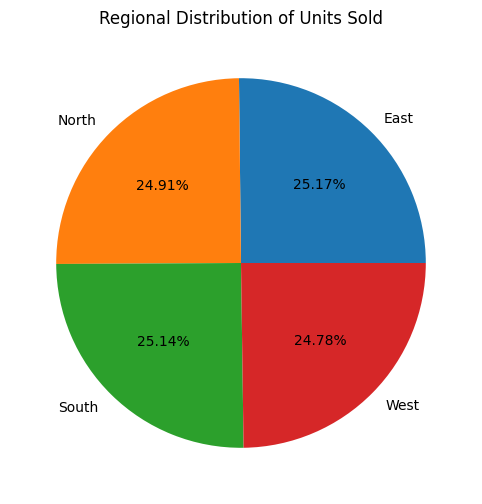

In [14]:
# Regional Analysis of Units Solid
regional_sales = Data_Frame.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8, 6))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.2f%%')
plt.title('Regional Distribution of Units Sold')
plt.ylabel('')
plt.show()


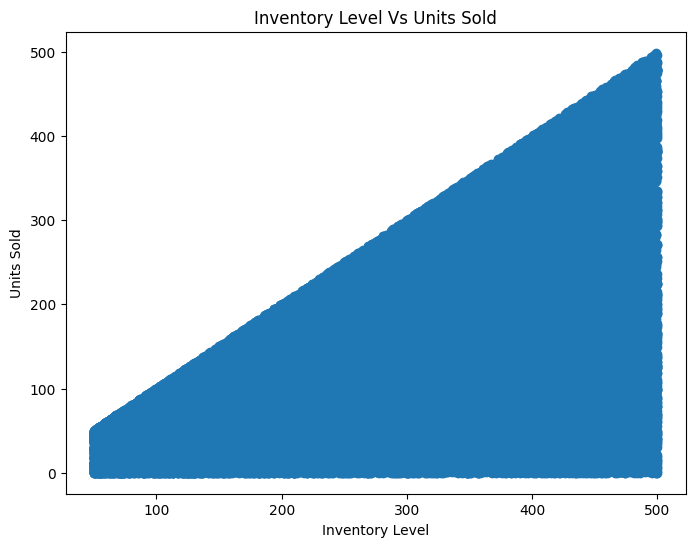

In [15]:
# Inventory Level vs Unit Gold
plt.figure(figsize=(8, 6))
plt.scatter(Data_Frame['Inventory Level'], Data_Frame['Units Sold'])
plt.title('Inventory Level Vs Units Sold')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.show()


C:\Users\mahes\AppData\Local\Temp\ipykernel_19388\3231531500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather Condition', y='Demand Forecast', data=Data_Frame, palette='coolwarm')


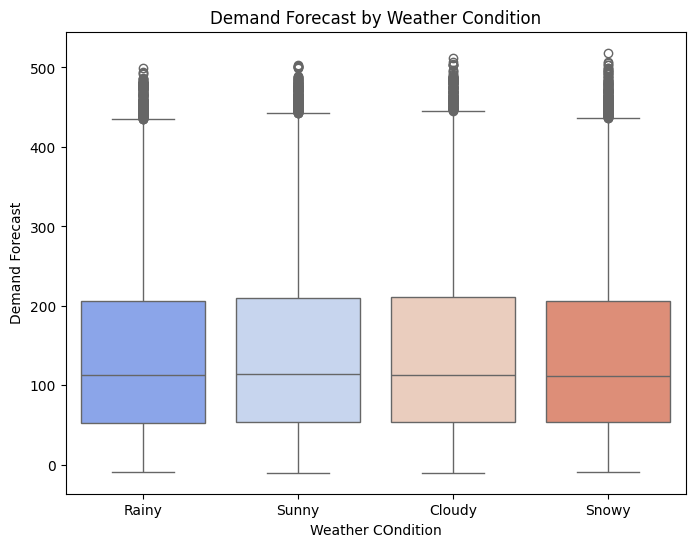

In [16]:
# Demand Forecast by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather Condition', y='Demand Forecast', data=Data_Frame, palette='coolwarm')
plt.title('Demand Forecast by Weather Condition')
plt.xlabel('Weather COndition')
plt.ylabel('Demand Forecast')
plt.show()


Seasonality
Autumn    142.803401
Spring    140.814250
Summer    140.470029
Winter    141.900097
Name: Demand Forecast, dtype: float64


C:\Users\mahes\AppData\Local\Temp\ipykernel_19388\1906126637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasonality', y='Demand Forecast', data=Data_Frame, palette="viridis")


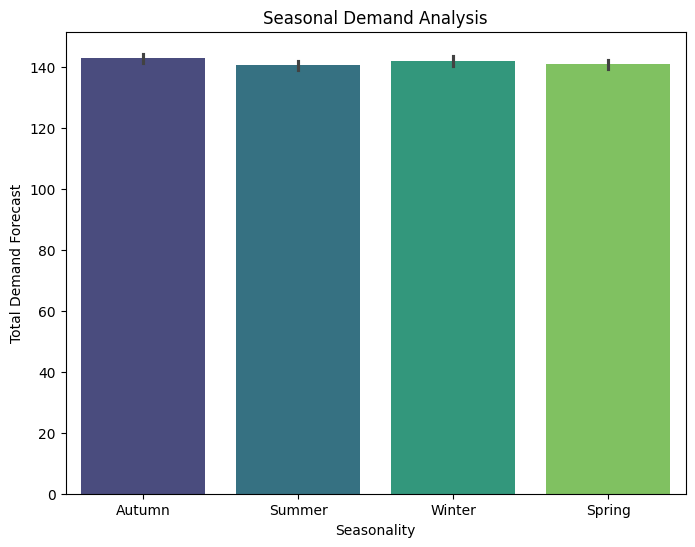

In [17]:
# Seasonal Demand Analysis
print(Data_Frame.groupby('Seasonality')['Demand Forecast'].mean())

plt.figure(figsize=(8, 6))
sns.barplot(x='Seasonality', y='Demand Forecast', data=Data_Frame, palette="viridis")
plt.title('Seasonal Demand Analysis')
plt.ylabel('Total Demand Forecast')
plt.show()

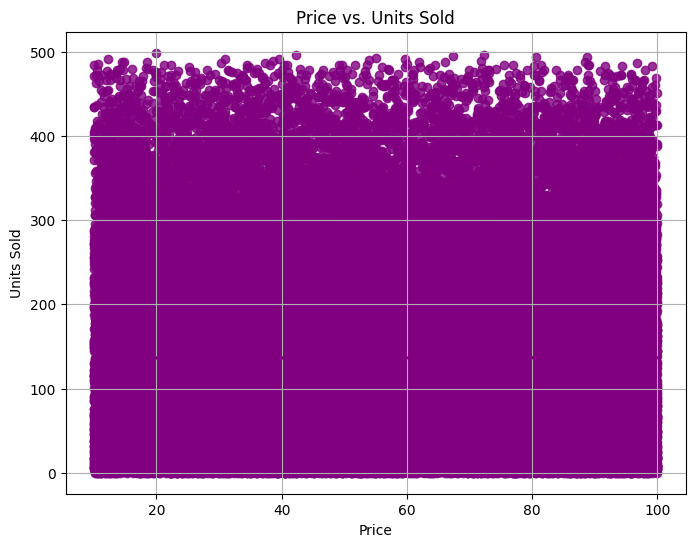

In [18]:
# Price Vs Units Sold
plt.figure(figsize=(8, 6))
sns.regplot(x='Price', y='Units Sold', data=Data_Frame, color='purple')
plt.title('Price vs. Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.grid()
plt.show()


5. ENCODING, SPLITTING

In [19]:
# Encode Categorical Features
label_encoders = {}
categorical_columns = ['Category', 'Region', 'Weather Condition', 'Seasonality']


In [20]:
# Encoding using Label Encoder
for col in categorical_columns:
    le = LabelEncoder()
    Data_Frame[col] = le.fit_transform(Data_Frame[col])
    label_encoders[col] = le


In [21]:
# Seperate Features and Target
X = Data_Frame.drop(columns=['Demand Forecast'])
Y = Data_Frame['Demand Forecast']


In [22]:
# Getting the Dimensions of the X and Y
print("X shape : ", X.shape)
print("Y shape : ", Y.shape)


X shape :  (73100, 11)
Y shape :  (73100,)


In [23]:
# Displaying the X and Y
print(X)
print(Y)

       Category  Region  Inventory Level  Units Sold  Units Ordered  Price  \
0             3       1              231         127             55  33.50   
1             4       2              204         150             66  63.01   
2             4       3              102          65             51  27.99   
3             4       1              469          61            164  32.72   
4             1       0              166          14            135  73.64   
...         ...     ...              ...         ...            ...    ...   
73095         2       0               96           8            127  73.73   
73096         4       1              313          51            101  82.57   
73097         0       3              278          36            151  11.11   
73098         4       0              374         264             21  53.14   
73099         3       0              117           6            165  78.39   

       Discount  Weather Condition  Holiday/Promotion  Competit

6. TRAIN_TEST_SPLIT AND SCALING

In [24]:
# Train Test Split 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [25]:
# Checking the shapes of above
print("X_Train shape : ", X_Train.shape)
print("Y_Train shape : ", Y_Train.shape)
print("X_Test shape  : ", X_Test.shape)
print("Y_Test shape  : ", Y_Test.shape)

X_Train shape :  (51170, 11)
Y_Train shape :  (51170,)
X_Test shape  :  (21930, 11)
Y_Test shape  :  (21930,)


In [26]:
# Scaling the Features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test  = scaler.transform(X_Test)


7. ANN MODEL

In [27]:
# ANN Architecture
model = Sequential()
model.add(Dense(64, input_dim= X_Train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))


C:\Users\mahes\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compiling the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [29]:
# Train the Model
history = model.fit(X_Train, Y_Train, validation_data=(X_Test, Y_Test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9296.0059 - mae: 61.5106 - val_loss: 150.0177 - val_mae: 9.9442
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1261.8263 - mae: 24.3873 - val_loss: 182.2988 - val_mae: 10.9205
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1226.2299 - mae: 23.8157 - val_loss: 145.6402 - val_mae: 9.7963
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1170.7163 - mae: 23.1375 - val_loss: 113.8270 - val_mae: 8.7731
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1211.6862 - mae: 23.3618 - val_loss: 168.9212 - val_mae: 10.4611
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1131.3018 - mae: 22.5698 - val_loss: 135.2472 - val_mae: 9.4701
Epoch 7/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1143.6584 - mae: 22.6193 - val_loss: 222.9802 - val_mae: 11.7800
Epoch 8/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1113.5408 - mae: 22.3661 - val_loss: 100.0008 - val_m

8. EVALUATE THE MODEL

In [30]:
# Evaluation
loss, mae = model.evaluate(X_Test, Y_Test)
print("Test Loss : (MSE) : ", loss)
print("Test Mean Absolute Error: (MAE) : ", mae)


686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 131.5441 - mae: 9.3187
Test Loss : (MSE) :  131.74835205078125
Test Mean Absolute Error: (MAE) :  9.333597183227539


9. SAVING THE MODEL

In [31]:
# Save the Model
model.save("Demand_Forecasting_Model.h5")
print("Model saved as Demand_Forecasting_Model.h5")

Model saved as Demand_Forecasting_Model.h5


10. LOAD THE SAVED MODEL

In [32]:
loaded_model = load_model("Demand_Forecasting_Model.h5")
print("Model Loaded Succesfully")

Model Loaded Succesfully


11. NEW DATA PREDICTION

In [33]:
new_data = pd.DataFrame({
    'Category': [1], 
    'Region': [2],
    'Inventory Level': [300],
    'Units Sold': [150],
    'Units Ordered': [120],
    'Price': [50],
    'Discount': [10],
    'Weather Condition': [1],
    'Holiday/Promotion': [0],
    'Competitor Pricing': [48],
    'Seasonality': [2]
})  # Ensure this matches training columns

new_data = scaler.transform(new_data)
predicted_demand = loaded_model.predict(new_data)
print(f"Predicted Demand: {predicted_demand[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Demand: 154.2626495361328
